In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from xgboost import XGBRegressor

In [44]:
New_LBR=pd.read_csv("C:/Users/kartik/Desktop/Data Science/Python/London Rented Bikes/london_merged.csv")

In [45]:
New_LBR.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [46]:
New_LBR.shape

(17414, 10)

In [47]:
New_LBR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [48]:
New_LBR.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


In [49]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Extract month, day, and hour features from the timestamp column
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df['month'] = df['timestamp'].apply(lambda x: x.month)
    df['day'] = df['timestamp'].apply(lambda x: x.day)
    df['hour'] = df['timestamp'].apply(lambda x: x.hour)
    df = df.drop('timestamp', axis=1)
    
    # One-hot encode weather_code column
    weather_dummies = pd.get_dummies(df['weather_code'], prefix='weather')
    df = pd.concat([df, weather_dummies], axis=1)
    df = df.drop('weather_code', axis=1)
    
    # Split df into X and y
    y = df['cnt']
    X = df.drop('cnt', axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [50]:
X_train, X_test, y_train, y_test = preprocess_inputs(New_LBR)

In [51]:
X_train

,t1,t2,hum,wind_speed,is_holiday,is_weekend,season,month,day,hour,weather_1.0,weather_2.0,weather_3.0,weather_4.0,weather_7.0,weather_10.0,weather_26.0
1930,-0.793215,-0.900317,-0.592599,-0.372328,-0.149651,-0.632510,-1.336593,-1.021919,1.055657,0.068510,-0.738682,-0.54635,1.983638,-0.307663,-0.375177,-0.028655,-0.061548
14312,1.536335,1.439022,0.739356,-0.941867,-0.149651,-0.632510,-0.441295,0.424858,1.169583,-1.231778,-0.738682,1.83033,-0.504124,-0.307663,-0.375177,-0.028655,-0.061548
2542,-1.330803,-1.051242,1.019767,-1.384842,-0.149651,-0.632510,-1.336593,-0.732564,0.486026,-0.798349,1.353763,-0.54635,-0.504124,-0.307663,-0.375177,-0.028655,-0.061548
16732,-0.434823,-0.221154,1.089870,-1.637971,-0.149651,-0.632510,1.349300,1.582280,-1.108942,0.357464,-0.738682,-0.54635,1.983638,-0.307663,-0.375177,-0.028655,-0.061548
5815,0.281962,0.382546,-0.662702,-0.372328,-0.149651,-0.632510,0.454002,0.714214,-1.450721,1.513276,1.353763,-0.54635,-0.504124,-0.307663,-0.375177,-0.028655,-0.061548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-1.062009,-1.353093,0.073378,1.273008,-0.149651,-0.632510,-1.336593,-0.732564,-0.995016,-0.653872,-0.738682,-0.54635,-0.504124,-0.307663,2.665406,-0.028655,-0.061548
17289,-1.241205,-1.126705,0.809458,-1.194996,-0.149651,-0.632510,1.349300,1.582280,1.511362,1.079846,1.353763,-0.54635,-0.504124,-0.307663,-0.375177,-0.028655,-0.061548
5192,1.177942,1.137172,-0.592599,-1.005149,-0.149651,1.581003,-0.441295,0.424858,-0.881089,1.657752,1.353763,-0.54635,-0.504124,-0.307663,-0.375177,-0.028655,-0.061548
12172,0.013168,0.156159,0.879561,-0.878585,-0.149651,1.581003,-1.336593,-0.443208,1.397436,-1.520731,1.353763,-0.54635,-0.504124,-0.307663,-0.375177,-0.028655,-0.061548


In [52]:
y_train

1930      948
14312      81
2542      603
16732    1012
5815      614
         ... 
10955    1864
17289     650
5192      967
12172     388
235       947
Name: cnt, Length: 12189, dtype: int64

In [53]:
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
y_pred = model.predict(X_test)

rmse = np.sqrt(np.mean((y_test - y_pred)**2))
r2 = 1 - (np.sum((y_test - y_pred)**2) / np.sum((y_test - y_test.mean())**2))

print("RMSE: {:.2f}".format(rmse))
print(" R^2: {:.4f}".format(r2))
fig = px.scatter(
      x=y_pred,
      y=y_test,
      labels={'x': "Predicted", 'y': "Actual"},
      title="Actual vs. Predicted Values",
      width=700,
      height=700)

fig.show()


In [55]:
data = ['y_pred','y_test']

In [56]:
data

['y_pred', 'y_test']

In [57]:
y_pred

array([-122.837685,  618.9654  , 1492.3748  , ...,  183.88376 ,
        130.80576 , 2239.64    ], dtype=float32)

In [58]:
data_ = pd.DataFrame(data)

In [59]:
import seaborn as sns
%matplotlib inline

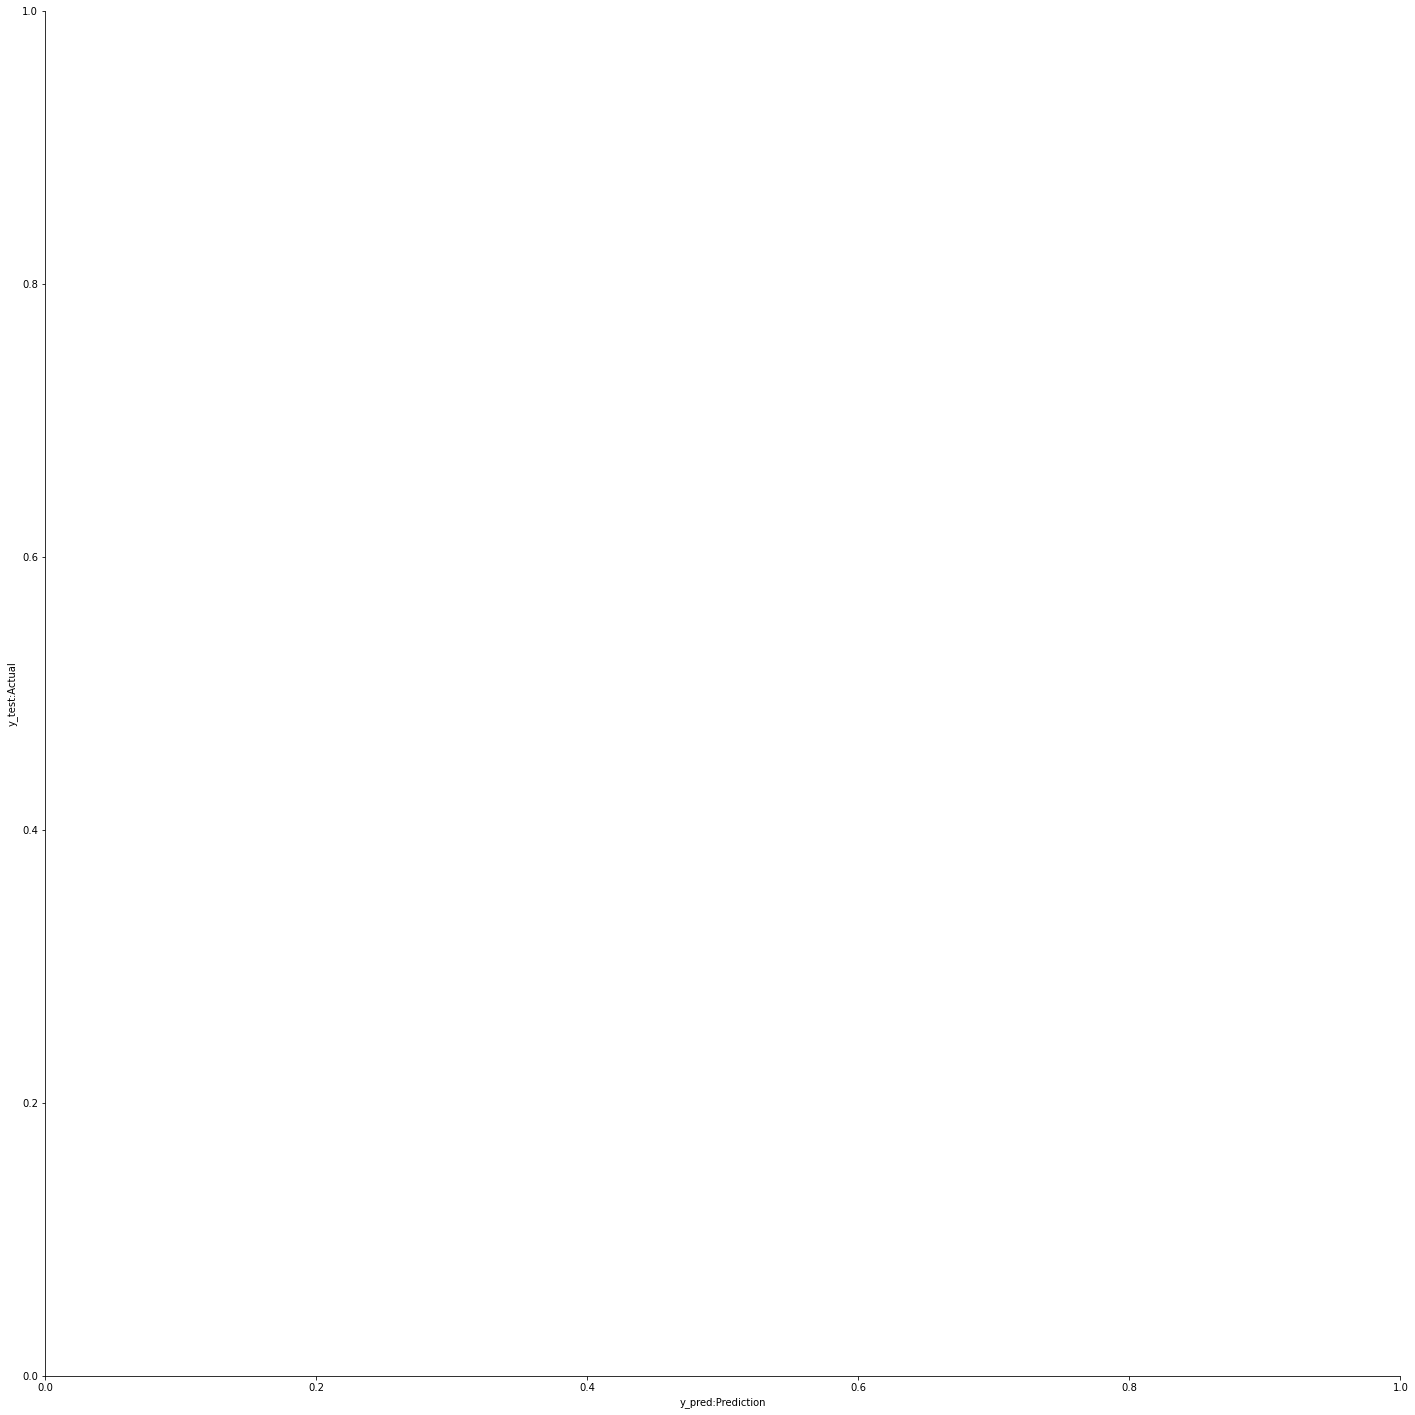

In [61]:
sns.pairplot(data_,x_vars=['y_pred:Prediction'],y_vars=['y_test:Actual'],height = 20, aspect=1, kind='reg')

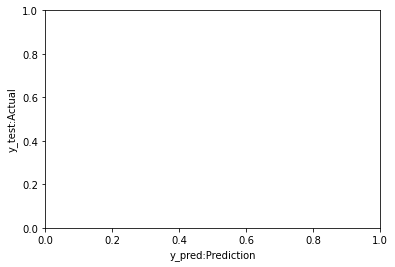

In [65]:
(ax1) = plt.subplots(1, 1, sharex=True) 
plt.xlabel('y_pred:Prediction') 
plt.ylabel('y_test:Actual') 
plt.show()